# SPRINT 3

Construir um script Jupyter notebook que carregue dados no formato de texto relacionado ao domínio automotivo. Esses dados podem ser obtidos da internet ou gerados pelo grupo, desde que sejam coerentes; os dados podem estar agrupados em arquivos .txt, .csv, e/ou .excel. Trate os dados, quando necessário, para que estejam nas representações adequadas usando Processamento de Linguagem Natural (Bag of Words, Word2Vec, entre outras).  Aplique pelo menos uma técnica de Redução de Dimensionalidade, uma de Agrupamento e uma de Classificação aos dados. Gere gráficos pertinentes que mostrem o desempenho dos algoritmos usados para cada tarefa.  Comente os resultados. Atenção: NÃO é permitido o uso dos datasets vistos como exemplos nas aulas.

Requisitos:

Entregar os arquivos de dados usados;
Entregar arquivo do script no formato .ipynb;

Conteúdo:

Códigos em Python;

Comentários em Markdown;

O nome do arquivo deve ser rm_nome_challenge_ford2022.ipynb, onde rm e nome devem ser substituídos pelo rm e nome do representante do grupo que submeter o trabalho;

**Integrantes do grupo:**

Lucas Silva dos Santos - 86361

Nicolas Breda Damasceno - 85741

Éverton Costa da Silva - 84618

Leonardo Seno Coelho - 84725

Vinícius de Paula - 85247

INFORMAÇÕES DO DATASET:

OpinRank Review - Dataset
Autor: Kavita Ganesan (kganes2@illinois.edu)
HTML Version: http://www.kavita-ganesan.com/entity-ranking-data
# Dataset Overview
Este dataset contém revisões completas sobre carros coletadas de Edmunds. 

O grupo tratou os dados originais do dataset para que as revisões pudessem ser utilizadas para prever o modelo dos carros.

In [126]:
# Para dados
import pandas as pd
import ast, json

## Adicione aqui as bibliotecas que achar necessárias
# Para criar o Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

# Para separar dados de treinamento e teste
from sklearn.model_selection import train_test_split

# Aprendizado de Máquina Supervisionado - Classificação
from sklearn.svm import LinearSVC

# Métricas de desempenho para a Classificação
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

# Para gráficos
import matplotlib.pyplot as plt


In [127]:
## Carregando os dados
dados = pd.read_csv('/content/car_reviews_1.csv', sep=';')

In [128]:
dados.head(5)

,date,name,review,favorite,model
0,10/19/2009,pduggs,I bought it new. First foreign car I have ever...,"Looks, power, and the many safety features.",volkswagen_passat
1,10/15/2009,Kory,I have to say that this is the worst car that ...,"Looks nice, but not reliable.",volkswagen_passat
2,09/21/2009,Nepsis,"First, I had to write just because several pe...","Interior finish, Overall Look & nice handling....",volkswagen_passat
3,08/25/2009,passatvw,I owned Volkswagen 2006 jetta it was shaking s...,"dashboard,,and i love blue lights,very cold ac,,",volkswagen_passat
4,07/11/2009,creeky,"07 Passat sedan recently purchased (20K), look...",NaN,volkswagen_passat


In [129]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      1378 non-null   object
 1   name      1378 non-null   object
 2   review    1378 non-null   object
 3   favorite  1368 non-null   object
 4   model     1378 non-null   object
dtypes: object(5)
memory usage: 54.0+ KB


In [130]:
dados.isnull().sum()

date         0
name         0
review       0
favorite    10
model        0
dtype: int64

In [131]:
dados = dados.dropna()

In [132]:
dados.isnull().sum()

date        0
name        0
review      0
favorite    0
model       0
dtype: int64

In [133]:
# Dividindo x e y
# Foram excluídos as colunas que não seriam utilizadas
X = dados['review']
y = dados['model']  # Nossa classe alvo

# Dividindo dados para treino e dados para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

In [134]:
cv = CountVectorizer(strip_accents='unicode', binary = 'True', max_features=200 )

In [135]:
#Criando a matriz e o vocabulário de palavras
X_train_bag = cv.fit_transform(X_train)
X_train_bag

<1094x200 sparse matrix of type '<class 'numpy.int64'>'
	with 36216 stored elements in Compressed Sparse Row format>

In [136]:
# Treinando o modelo de Regressão logistica
classificador = LinearSVC()
classificador.fit(X_train_bag, y_train)

LinearSVC()

In [137]:
# Primeiro precisamos dos embbedings do x de teste
X_test_bag = cv.transform(X_test)
X_test_bag.shape

(274, 200)

In [138]:
# Fazendo as previsões
y_pred_bag = classificador.predict(X_test_bag)
y_pred_bag

array(['toyota_yaris', 'toyota_yaris', 'volkswagen_gti', 'volkswagen_gti',
       'volkswagen_passat', 'volkswagen_passat', 'volkswagen_jetta',
       'volkswagen_rabbit', 'volkswagen_passat', 'nissan_altima',
       'volkswagen_passat', 'toyota_yaris', 'volkswagen_jetta',
       'nissan_altima', 'toyota_tacoma', 'volkswagen_gti',
       'volkswagen_rabbit', 'volkswagen_rabbit', 'toyota_yaris',
       'volkswagen_eos', 'volkswagen_new_beetle', 'volkswagen_passat',
       'volkswagen_jetta', 'volkswagen_jetta', 'nissan_altima',
       'volkswagen_rabbit', 'toyota_yaris', 'toyota_yaris',
       'volkswagen_passat', 'toyota_tacoma', 'volkswagen_passat',
       'volkswagen_passat', 'toyota_yaris', 'toyota_yaris',
       'toyota_tacoma', 'volkswagen_eos', 'nissan_altima',
       'volkswagen_new_beetle', 'volkswagen_eos', 'toyota_yaris',
       'volkswagen_passat', 'volkswagen_passat', 'nissan_altima',
       'nissan_altima', 'volkswagen_gti', 'volkswagen_rabbit',
       'nissan_altima', 'vo

<Figure size 3600x1800 with 0 Axes>

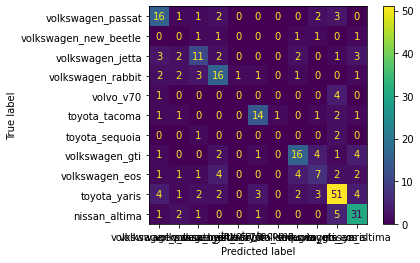

In [139]:
cm_reglog = confusion_matrix(y_test, y_pred_bag, labels = ['volkswagen_passat','volkswagen_new_beetle','volkswagen_jetta','volkswagen_rabbit','volvo_v70','toyota_tacoma','toyota_sequoia','volkswagen_gti','volkswagen_eos','toyota_yaris','nissan_altima'])

# plotando uma figura com a matriz de confusao
figure = plt.figure(figsize=(50, 25))
disp = ConfusionMatrixDisplay(confusion_matrix = cm_reglog, display_labels=['volkswagen_passat','volkswagen_new_beetle','volkswagen_jetta','volkswagen_rabbit','volvo_v70','toyota_tacoma','toyota_sequoia','volkswagen_gti','volkswagen_eos','toyota_yaris','nissan_altima'])
disp.plot(values_format='d') 

In [140]:
# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_pred_bag))

                       precision    recall  f1-score   support

        nissan_altima       0.66      0.76      0.70        41
       toyota_sequoia       0.00      0.00      0.00         3
        toyota_tacoma       0.70      0.67      0.68        21
         toyota_yaris       0.72      0.71      0.71        72
       volkswagen_eos       0.39      0.32      0.35        22
       volkswagen_gti       0.62      0.55      0.58        29
     volkswagen_jetta       0.52      0.46      0.49        24
volkswagen_new_beetle       0.00      0.00      0.00         5
    volkswagen_passat       0.53      0.64      0.58        25
    volkswagen_rabbit       0.55      0.59      0.57        27
            volvo_v70       0.00      0.00      0.00         5

             accuracy                           0.59       274
            macro avg       0.43      0.43      0.42       274
         weighted avg       0.59      0.59      0.59       274



Como a acurácia alcançada ainda não foi satisfatória, vamos utilizar o TF-IDF:

In [141]:
# Para criamos o modelo de TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

In [142]:
tfidf = TfidfVectorizer(max_features=1000)

In [143]:
X_train_tfidf = tfidf.fit_transform(X_train) 
print(X_train_tfidf.shape)

X_test_tfidf = tfidf.transform(X_test) # Atenção ao fit_transform diferente aqui
print(X_test_tfidf.shape)

(1094, 1000)
(274, 1000)


In [144]:
# Treinando o modelo de Regressão logistica
classificador = LinearSVC()
classificador.fit(X_train_tfidf, y_train)

LinearSVC()

In [145]:
# Fazendo as previsões
y_pred_tfidf = classificador.predict(X_test_tfidf)
y_pred_tfidf

array(['volkswagen_passat', 'toyota_yaris', 'volkswagen_gti',
       'volkswagen_gti', 'volkswagen_passat', 'volkswagen_passat',
       'volkswagen_rabbit', 'volkswagen_passat', 'volkswagen_passat',
       'nissan_altima', 'volkswagen_passat', 'toyota_yaris',
       'toyota_yaris', 'nissan_altima', 'toyota_tacoma',
       'volkswagen_new_beetle', 'volkswagen_eos', 'volkswagen_jetta',
       'toyota_yaris', 'volkswagen_eos', 'volkswagen_rabbit',
       'volkswagen_passat', 'volkswagen_rabbit', 'volkswagen_new_beetle',
       'nissan_altima', 'volkswagen_rabbit', 'toyota_yaris',
       'toyota_yaris', 'volkswagen_passat', 'toyota_yaris',
       'volkswagen_rabbit', 'nissan_altima', 'toyota_yaris',
       'toyota_yaris', 'volkswagen_eos', 'volkswagen_eos',
       'volkswagen_passat', 'volkswagen_passat', 'volkswagen_eos',
       'toyota_yaris', 'volkswagen_passat', 'volkswagen_jetta',
       'nissan_altima', 'nissan_altima', 'volkswagen_gti',
       'volkswagen_rabbit', 'nissan_altima', '

<Figure size 1080x360 with 0 Axes>

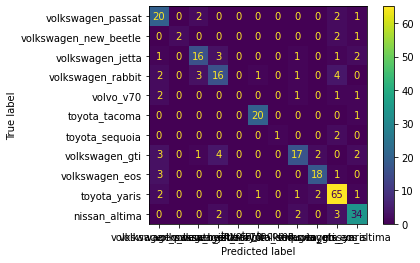

In [146]:
cm_reglog = confusion_matrix(y_test, y_pred_tfidf, labels = ['volkswagen_passat','volkswagen_new_beetle','volkswagen_jetta','volkswagen_rabbit','volvo_v70','toyota_tacoma','toyota_sequoia','volkswagen_gti','volkswagen_eos','toyota_yaris','nissan_altima'])

# plotando uma figura com a matriz de confusao
figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = cm_reglog, display_labels=['volkswagen_passat','volkswagen_new_beetle','volkswagen_jetta','volkswagen_rabbit','volvo_v70','toyota_tacoma','toyota_sequoia','volkswagen_gti','volkswagen_eos','toyota_yaris','nissan_altima'])
disp.plot(values_format='d') 

In [147]:
# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_pred_tfidf))

                       precision    recall  f1-score   support

        nissan_altima       0.79      0.83      0.81        41
       toyota_sequoia       1.00      0.33      0.50         3
        toyota_tacoma       0.91      0.95      0.93        21
         toyota_yaris       0.80      0.90      0.85        72
       volkswagen_eos       0.82      0.82      0.82        22
       volkswagen_gti       0.74      0.59      0.65        29
     volkswagen_jetta       0.73      0.67      0.70        24
volkswagen_new_beetle       1.00      0.40      0.57         5
    volkswagen_passat       0.61      0.80      0.69        25
    volkswagen_rabbit       0.64      0.59      0.62        27
            volvo_v70       0.00      0.00      0.00         5

             accuracy                           0.76       274
            macro avg       0.73      0.63      0.65       274
         weighted avg       0.75      0.76      0.75       274



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Agora a acurácia melhorou bastante, mas ainda é muito baixa para ser utilizada comercialmente. Isso se dá pelo fato de que os dados de revisão devem ser muito pouco relacionados com os modelos dos carros.

In [148]:
# Para usar corpus e funções de NLP
import spacy

import numpy

# Para visualizar
import pandas as pd

# Para fazer gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Para criamos o modelo de Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

# Redução de dimensionalidade
from sklearn.decomposition import PCA  
from sklearn.manifold import TSNE

# Para gerarmos agrupamentos de Reviews
from sklearn.cluster import KMeans,  AgglomerativeClustering

# Avaliacao de desempenho do Agrupamento
from sklearn.metrics import silhouette_score

In [149]:
import spacy
from spacy.lang.en.examples import sentences 

In [150]:
!python -m spacy download en_core_web_md

2022-09-22 02:45:21.950623: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42.8 MB 1.5 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [151]:
nlp_en = spacy.load("en_core_web_md")  # Carregando o vocabulario

In [152]:
cv = CountVectorizer(strip_accents='unicode', # strip_accents irá remover os acentos
                     binary = 'True', # True tem  palavra = 1, não tem = 0
                     max_features=1000 # max_features é o número máximo de atributos para o meu vocabulário
                    )

In [153]:
#Criando a matriz e o vocabulário de palavras
matriz = cv.fit_transform(X_test)
matriz

<274x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 14315 stored elements in Compressed Sparse Row format>

In [154]:
vocabulario = sorted(cv.vocabulary_.items())
vocabulario

[('000', 0),
 ('06', 1),
 ('07', 2),
 ('0t', 3),
 ('10', 4),
 ('12', 5),
 ('14', 6),
 ('15', 7),
 ('16', 8),
 ('17', 9),
 ('18', 10),
 ('20', 11),
 ('200', 12),
 ('2000', 13),
 ('2001', 14),
 ('2003', 15),
 ('2004', 16),
 ('2005', 17),
 ('2007', 18),
 ('21', 19),
 ('23', 20),
 ('24', 21),
 ('25', 22),
 ('26', 23),
 ('27', 24),
 ('28', 25),
 ('29', 26),
 ('2nd', 27),
 ('30', 28),
 ('32', 29),
 ('33', 30),
 ('34', 31),
 ('35', 32),
 ('36', 33),
 ('37', 34),
 ('38', 35),
 ('3rd', 36),
 ('40', 37),
 ('42', 38),
 ('4dr', 39),
 ('4th', 40),
 ('4wd', 41),
 ('50', 42),
 ('500', 43),
 ('5000', 44),
 ('5l', 45),
 ('5sl', 46),
 ('60', 47),
 ('65', 48),
 ('70', 49),
 ('80', 50),
 ('90', 51),
 ('a4', 52),
 ('able', 53),
 ('about', 54),
 ('above', 55),
 ('absolutely', 56),
 ('ac', 57),
 ('accelerate', 58),
 ('acceleration', 59),
 ('accord', 60),
 ('actually', 61),
 ('acura', 62),
 ('add', 63),
 ('added', 64),
 ('adult', 65),
 ('adults', 66),
 ('affordable', 67),
 ('after', 68),
 ('aftermarket', 69),

In [155]:
colunas = [token[0] for token in sorted(cv.vocabulary_.items())]
pd.options.display.max_columns = 999 # Para aumentar o número de colunas exibidas
embedded_data = pd.DataFrame(matriz.todense(), columns=colunas)

In [156]:
km = KMeans(n_clusters=11, random_state=42) 
kmeans_labels = km.fit_predict(embedded_data)

In [157]:
silhouette_score(embedded_data,kmeans_labels) # Quanto mais próximo de 1, melhor

0.0076146695367508635

O valor acima mostra que o algoritmo está muito distante do ideal para que haja uma clusterização.

In [158]:
embedded_data.head(10)

,000,06,07,0t,10,12,14,15,16,17,18,20,200,2000,2001,2003,2004,2005,2007,21,23,24,25,26,27,28,29,2nd,30,32,33,34,35,36,37,38,3rd,40,42,4dr,4th,4wd,50,500,5000,5l,5sl,60,65,70,80,90,a4,able,about,above,absolutely,ac,accelerate,acceleration,accord,actually,acura,add,added,adult,adults,affordable,after,aftermarket,again,ago,agree,ahead,air,airbags,all,almost,alot,already,also,alternative,although,altima,always,am,amazing,amenities,american,amount,an,and,another,any,anyone,anything,anywhere,are,area,arm,around,as,ask,at,attention,audi,audio,auto,automatic,available,average,averaged,averaging,away,awesome,back,bad,base,based,basic,basically,battery,be,beat,beats,because,been,beetle,before,being,believe,bells,belt,best,better,between,big,biggest,bit,black,blast,blend,blue,bmw,body,bose,both,bought,box,boxes,brake,brakes,braking,break,brought,build,built,bumper,but,button,buy,buying,by,cab,cabin,call,called,came,camry,can,cannot,car,careful,cargo,cars,cd,center,change,changes,cheap,cheaper,check,choice,choices,city,civic,class,classy,climbing,close,closed,clutch,college,color,come,comes,comfort,comfortable,comfortably,coming,commute,commuter,compact,compared,complaint,complaints,complete,completely,computer,concerned,conditions,consider,console,constantly,control,controls,convertible,cool,corners,corolla,cost,could,couldn,coupe,couple,cramped,crazy,cruise,customer,cute,cvt,cyl,cylinder,daily,dash,day,days,deal,dealer,dealership,dealerships,decent,decided,decision,definitely,design,designed,despite,did,didn,difference,different,difficult,disappointed,display,do,does,doesn,doing,don,done,door,doors,down,dream,drive,driven,driver,drivers,drives,driving,drove,dsg,due,during,each,ease,easily,easy,echo,economical,economy,efficient,either,electric,electronic,end,ended,engine,engineering,enjoy,enjoyable,enjoyed,enough,entry,eos,especially,etc,europe,european,even,ever,every,everyone,everything,exactly,excellent,except,exception,expect,expected,expensive,experience,experienced,exterior,extra,extremely,fact,factor,factory,family,fan,fantastic,far,fast,favorite,feature,features,feel,feeling,feels,feet,fell,felt,few,finally,find,fine,finish,firm,first,fit,fits,five,fix,flat,fold,for,ford,found,four,free,freeway,friend,friends,from,front,ft,fuel,full,fully,fun,funny,g35,gallon,gas,gauge,gear,gears,german,germany,get,gets,getting,give,gives,glad,glove,go,goes,going,good,got,gotten,great,ground,gti,had,half,handle,handles,handling,hands,happened,happier,happy,hard,has,hatch,hatchback,hated,haul,have,haven,having,he,head,heat,heated,help,helps,her,here,high,higher,highly,highway,highways,hills,hit,hold,holds,home,honda,honestly,hope,hoping,how,however,hp,huge,husband,hwy,hybrid,if,import,impressed,impressions,impressive,in,inch,including,incredible,initial,initially,inside,installed,intelligent,interior,into,is,isn,issue,issues,it,its,japanese,jetta,job,joy,jump,junk,just,keep,keeping,key,kick,kids,kind,know,known,lack,lane,large,larger,last,later,layout,lb,lbs,lease,least,leather,left,leg,less,let,level,life,light,lighting,lights,like,liked,limit,limited,line,list,liter,...,ll,loaded,local,locks,long,longer,look,looked,looking,looks,lost,lot,lots,love,loved,loves,loving,low,luxury,made,maintenance,major,make,makes,making,manual,many,market,match,materials,maxima,may,maybe,me,mercedes,mid,middle,might,milage,mile,mileage,miles,mine,mini,minutes,mirror,miss,mistake,mixed,mode,model,models,money,month,months,more,most,mostly,motor,mountain,mountains,mounted,mpg,mph,much,must,my,name,nav,navigation,need,needed,needs,never,new,next,nice,nicely,night,nissan,no,noise,non,none,normal,not,notch,nothing,noticeable,noticed,now,number,of,off,offer,offers,oil,ok,old,on,once,one,only,onto,open,opinion,options,or,other,others,otherwise,our,out,outside,outstanding,over,overall,own,owned,owner,owning,package,packages,paint,parents,park,parking,part,parts,passat,passing,past,pay,pedal,people,pep,peppy,per,perfect,perfectly,performance,pick,picked,pickup,piece,place,p

In [159]:
# PCA
pca = PCA(n_components=2) # Queremos 2 componentes pois queremos 2 eixos X e Y apenas
X_pca = pca.fit_transform(embedded_data) 

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(embedded_data)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


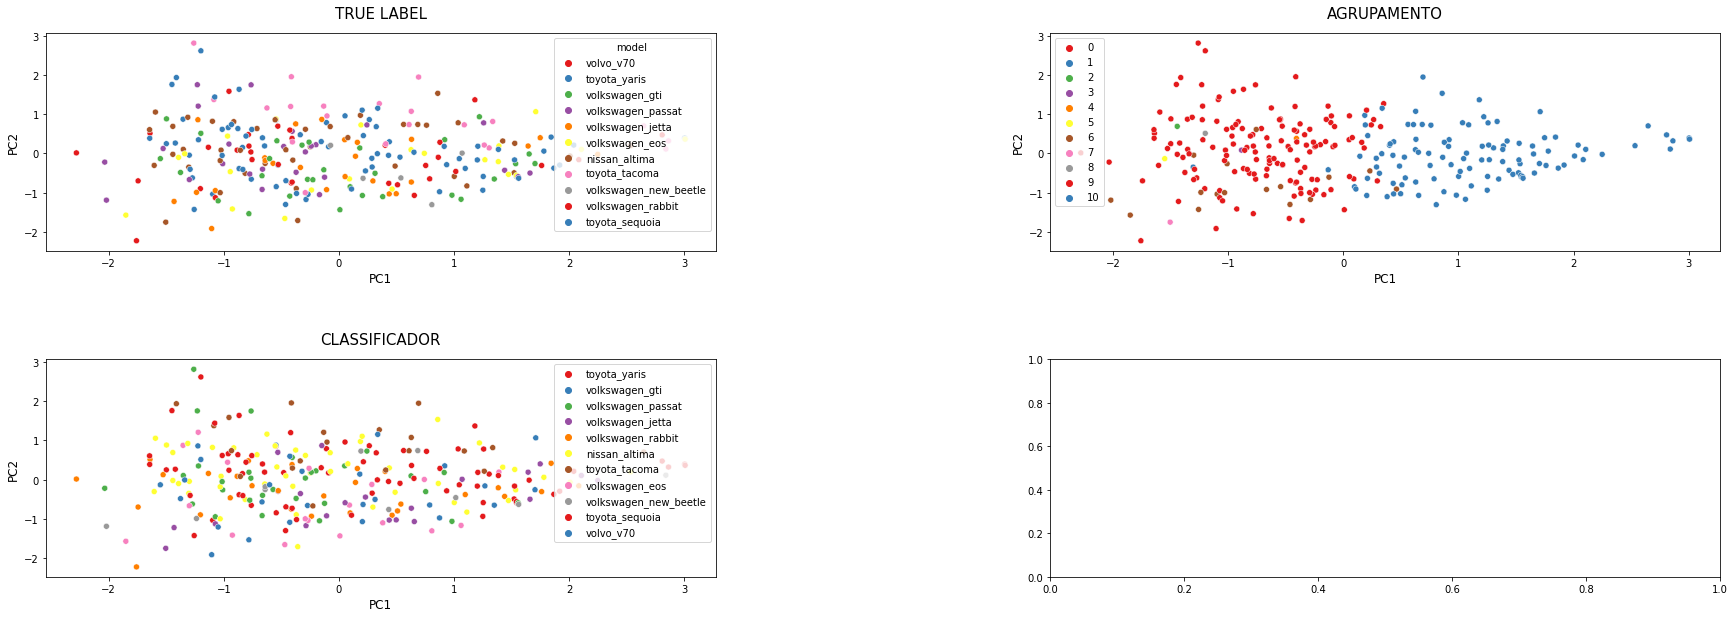

In [160]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(30 ,10))

# Plot dos gráficos
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=y_test, palette='Set1', ax=ax[0][0])
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=kmeans_labels, palette='Set1', ax=ax[0][1])
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=y_pred_bag, palette='Set1', ax=ax[1][0])

# Nome dos eixos
ax[0][0].set_xlabel("PC1", fontsize=12)
ax[0][0].set_ylabel("PC2", fontsize=12)
ax[0][1].set_xlabel("PC1", fontsize=12)
ax[0][1].set_ylabel("PC2", fontsize=12)
ax[1][0].set_xlabel("PC1", fontsize=12)
ax[1][0].set_ylabel("PC2", fontsize=12)

# Títulos
ax[0][0].set_title("TRUE LABEL", fontsize=15, pad=15)
ax[0][1].set_title("AGRUPAMENTO", fontsize=15, pad=15)
ax[1][0].set_title("CLASSIFICADOR", fontsize=15, pad=15)

# Vamos aumentar a separação entre os gráficos
plt.subplots_adjust(wspace = 0.5, hspace=0.5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


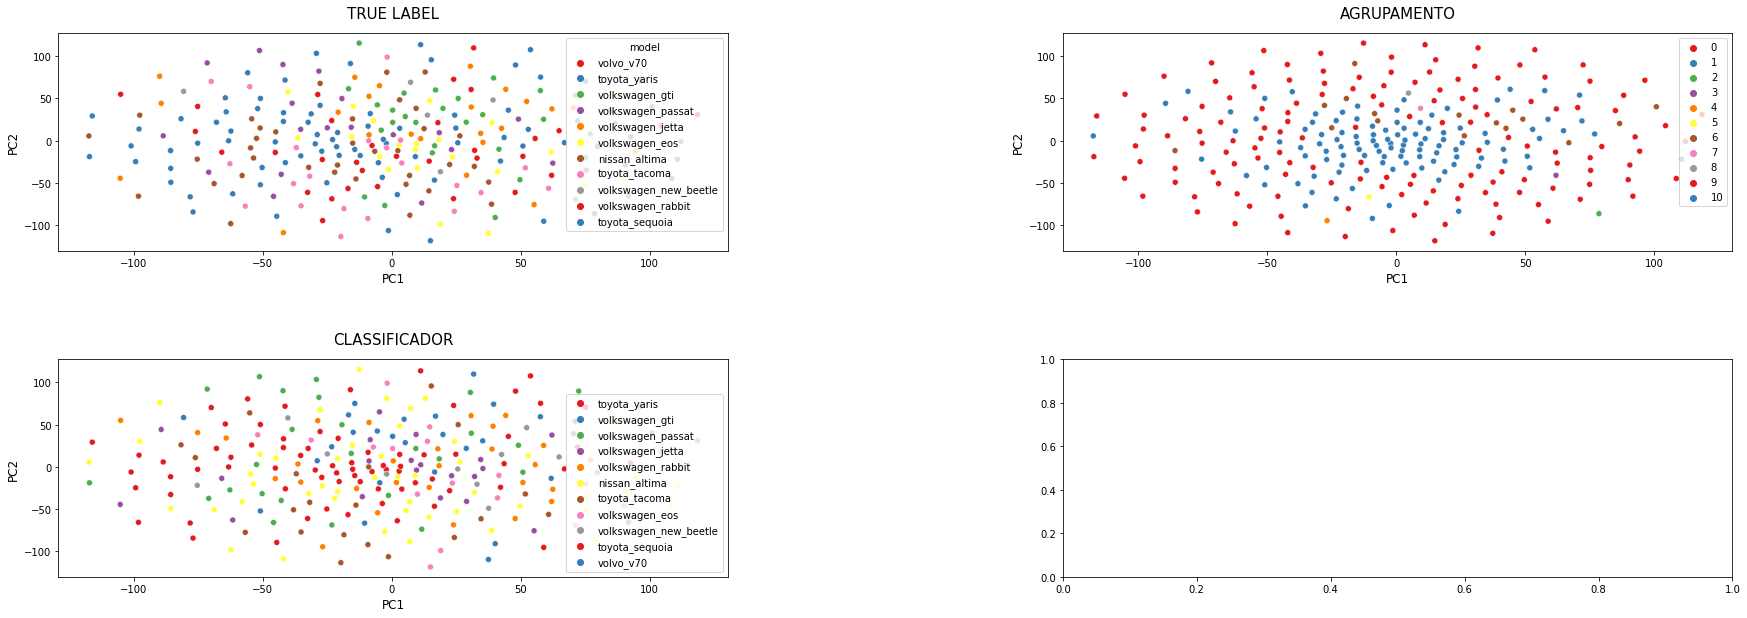

In [161]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(30 ,10))

# Plot dos gráficos
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=y_test, palette='Set1', ax=ax[0][0])
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=kmeans_labels, palette='Set1', ax=ax[0][1])
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=y_pred_bag, palette='Set1', ax=ax[1][0])

# Nome dos eixos
ax[0][0].set_xlabel("PC1", fontsize=12)
ax[0][0].set_ylabel("PC2", fontsize=12)
ax[0][1].set_xlabel("PC1", fontsize=12)
ax[0][1].set_ylabel("PC2", fontsize=12)
ax[1][0].set_xlabel("PC1", fontsize=12)
ax[1][0].set_ylabel("PC2", fontsize=12)

# Títulos
ax[0][0].set_title("TRUE LABEL", fontsize=15, pad=15)
ax[0][1].set_title("AGRUPAMENTO", fontsize=15, pad=15)
ax[1][0].set_title("CLASSIFICADOR", fontsize=15, pad=15)

# Vamos aumentar a separação entre os gráficos
plt.subplots_adjust(wspace = 0.5, hspace=0.5)